## Question 1 - Consider the “College” data in the ISLR2 package:

### a)	Present some visualizations of this data such as pair plots and histograms? Do you think any scaling or transformation is required?

In [1]:
#install.packages("corrplot")
#install.packages("tidyr",type="binary")
#install.packages('ISLR2')
library(ISLR2)
library(rpart)
library(rpart.plot)
library(caret)
library(dplyr)
library(tidyr)
library(corrplot)
library(arules)

Warning message:
"package 'rpart' was built under R version 3.6.3"Warning message:
"package 'rpart.plot' was built under R version 3.6.3"Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'tidyr' was built under R version 3.6.3"corrplot 0.92 loaded
Warning message:
"package 'arules' was built under R version 3.6.3"Loading required package: Matrix
Warning message:
"package 'Matrix' was built under R version 3.6.3"
Attaching package: 'Matrix'

The following objects are masked from 'packag

In [2]:
data(College)
head(College)
dim(College)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


[1] 777  18

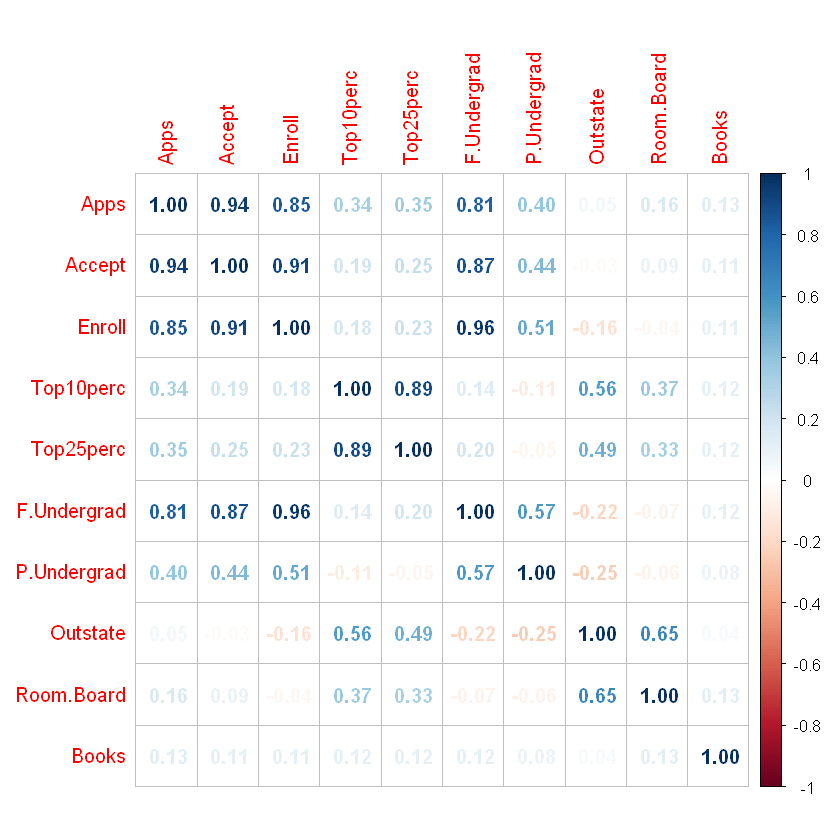

In [3]:
# here we can see that very features are highly correlated to each other
corrplot(cor(College[,2:11]), method = "number")

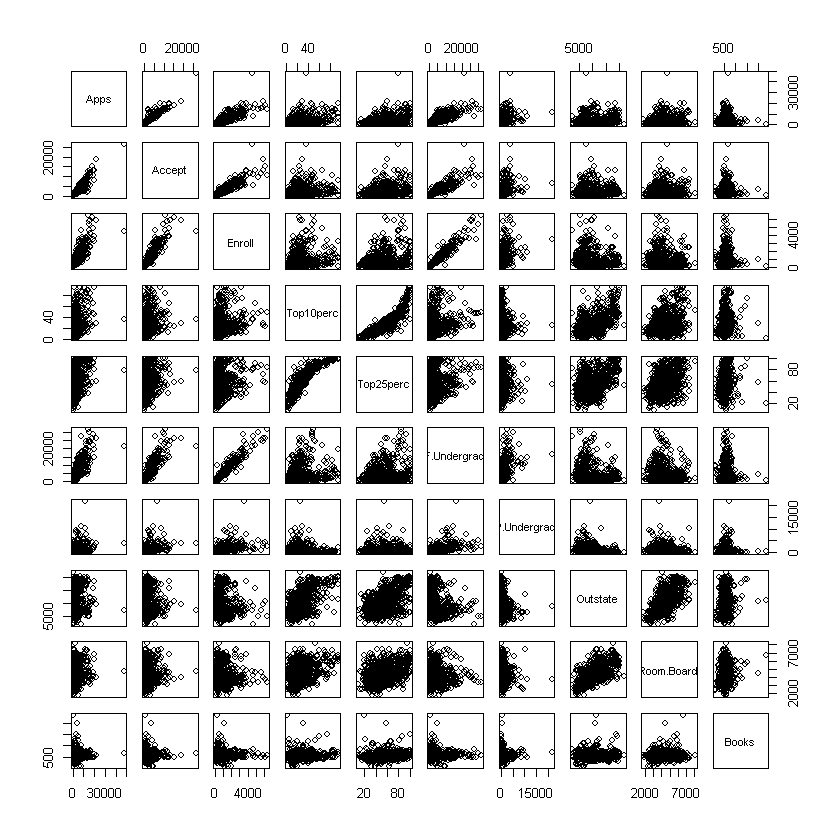

In [4]:
pairs(College[,2:11])  

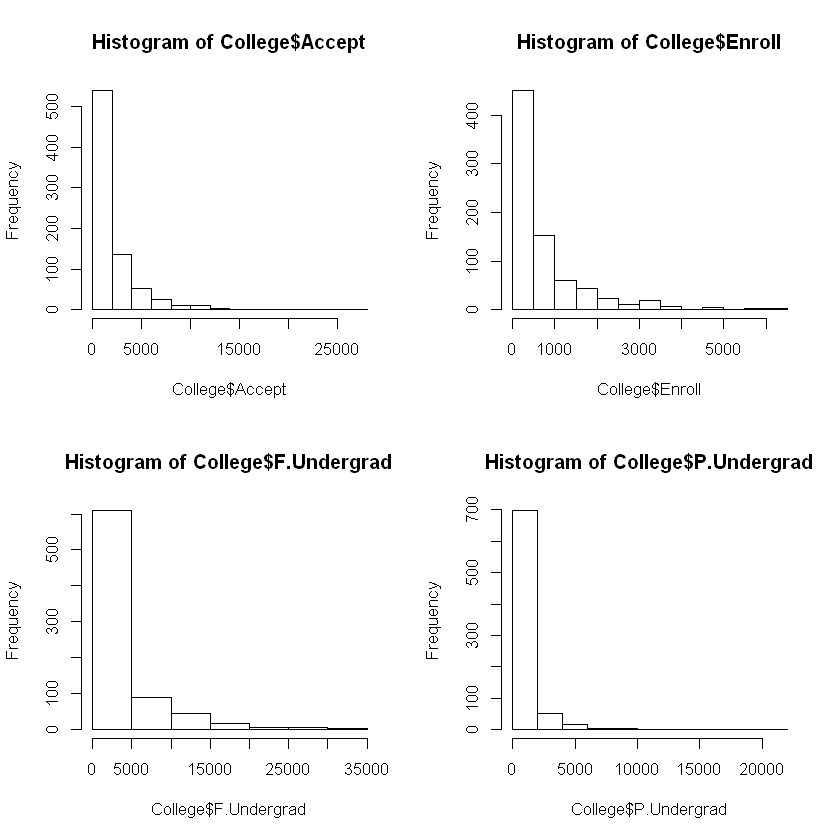

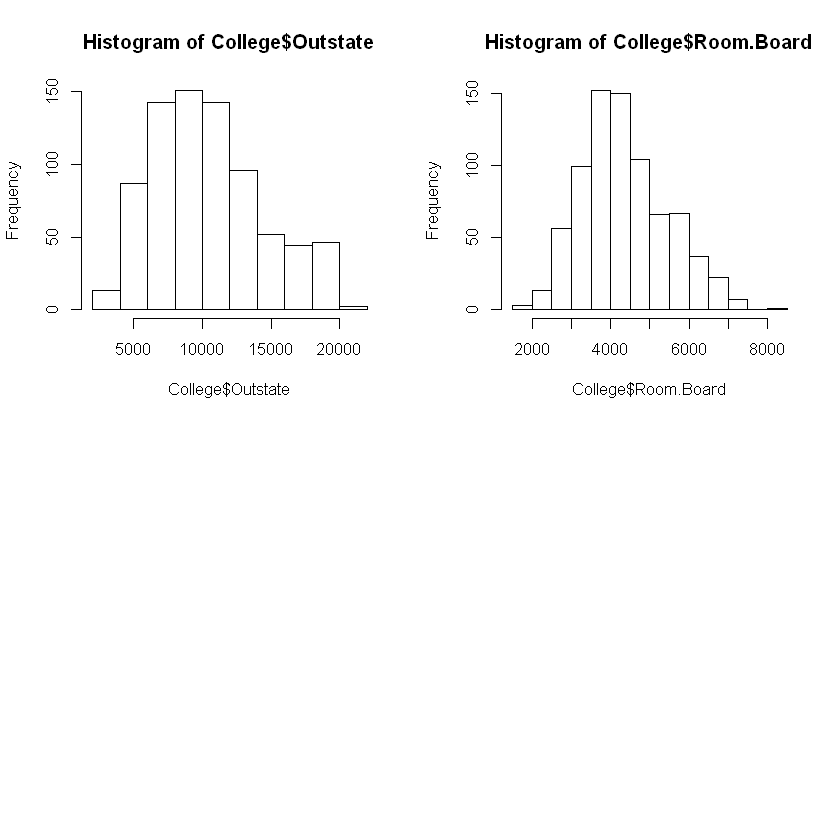

In [5]:
par(mfrow=c(2,2))
hist(College$Accept, breaks=10)
hist(College$Enroll, breaks=10)
hist(College$F.Undergrad, breaks=10)
hist(College$P.Undergrad, breaks=10)
hist(College$Outstate,breaks=10)
hist(College$Room.Board,breaks=10)

#From the histogram we can infer that the outstate and room.board requires scaling and transformstion.

### b)	Scale the data appropriately (e.g., log transform) and present the visualizations in part A. Have any new relationships been revealed.

In [6]:
scaled_data <- College
scaled_data[, 2:18] <- log(scaled_data[, 2:18])
#scaled_data[, 2:18] <- scale(scaled_data[, 2:18])

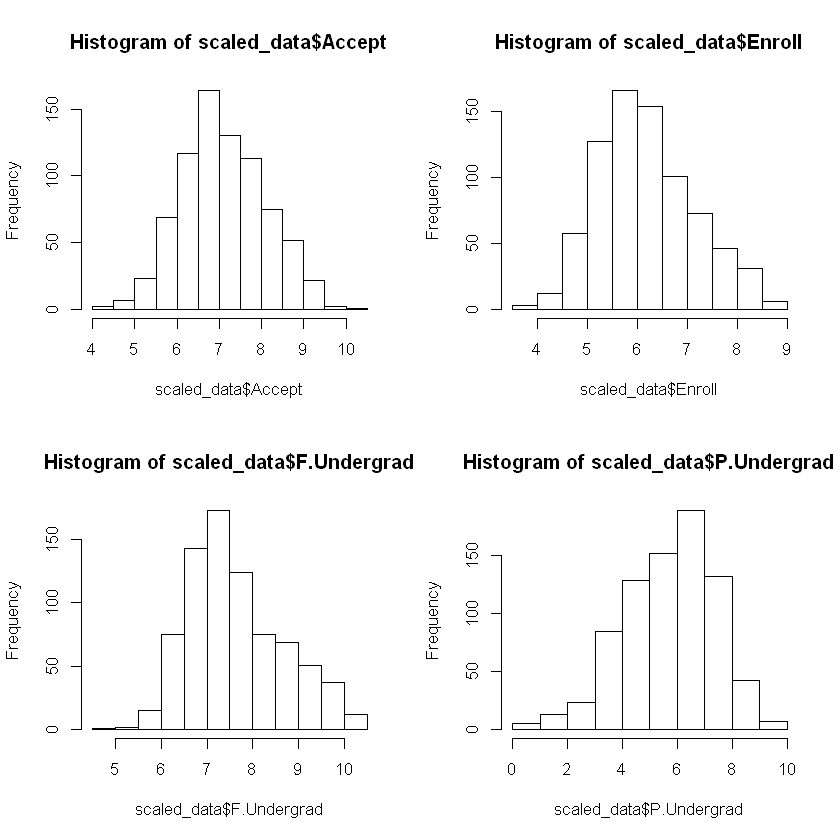

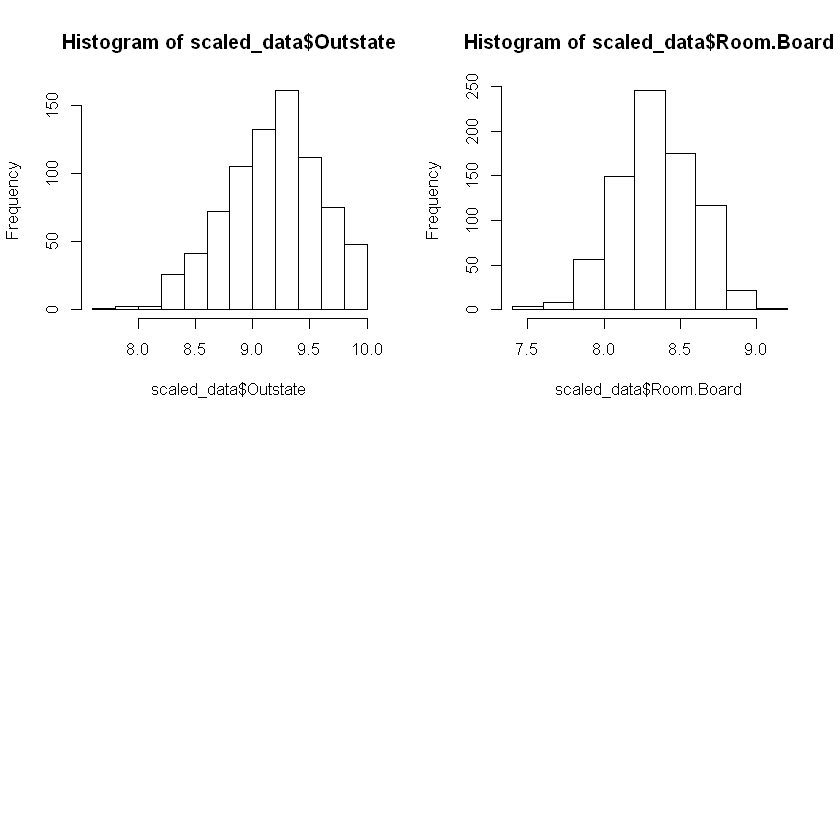

In [7]:
par(mfrow=c(2,2))
hist(scaled_data$Accept, breaks=10)
hist(scaled_data$Enroll, breaks=10)
hist(scaled_data$F.Undergrad, breaks=10)
hist(scaled_data$P.Undergrad, breaks=10)
hist(scaled_data$Outstate,breaks=10)
hist(scaled_data$Room.Board,breaks=10)

#So after log transformation we can see that now the new data is normally distributed for all the plotted histograms.

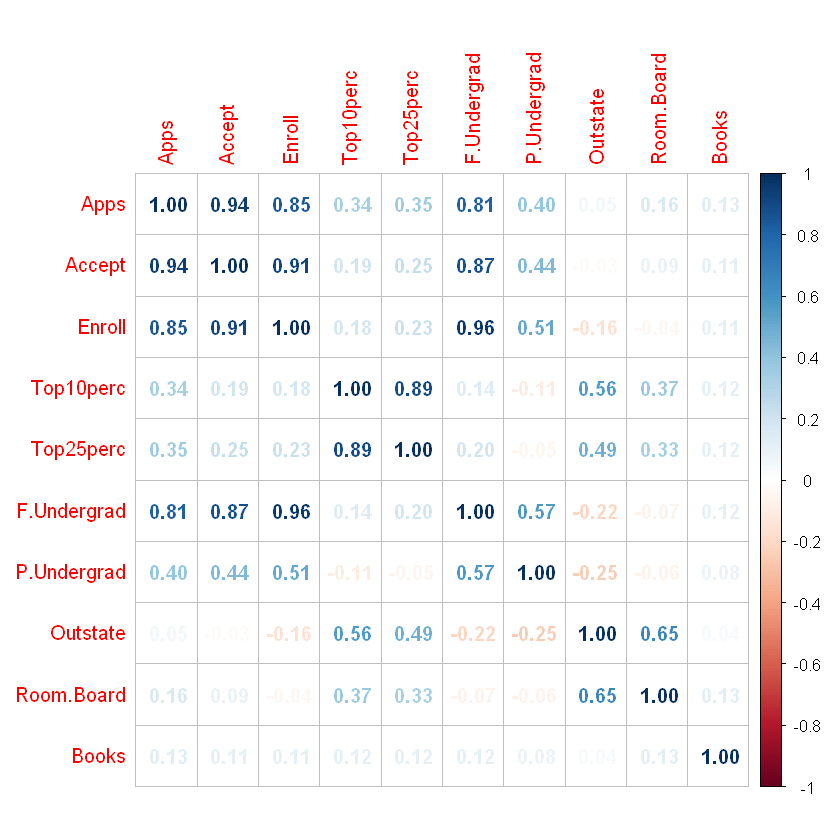

In [8]:
corrplot(cor(College[,2:11]), method = "number")

#After transforming the data, we can see new relations are built between the variables.

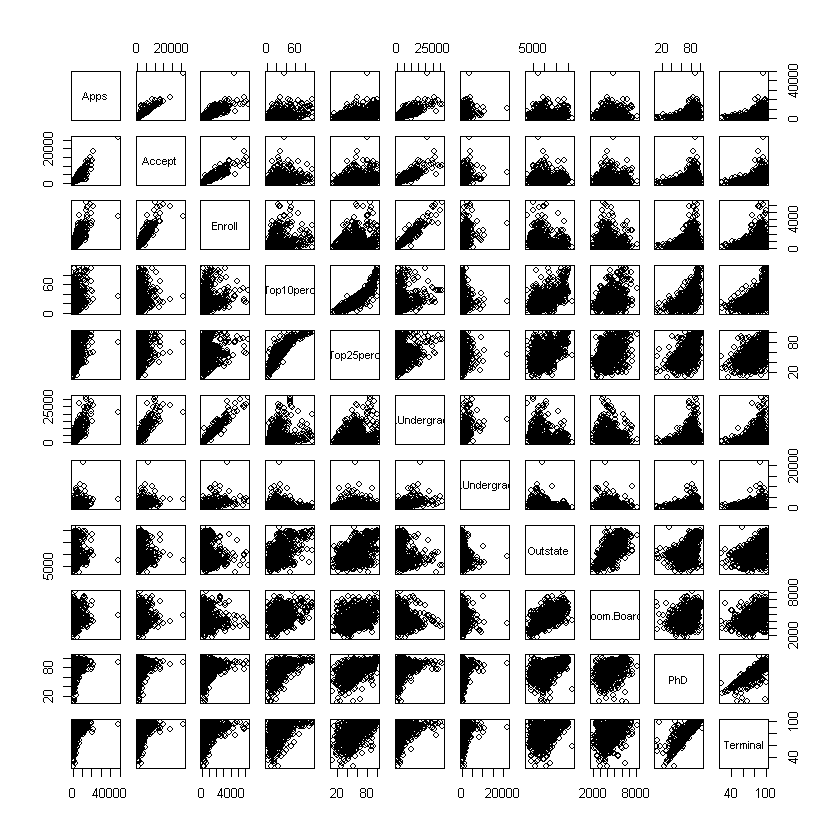

In [9]:
pairs(College[,c(2:10,13,14)])

# In below graph we can see much of a linear relationship between the data after transformation

### c)	Subset the data into two data frames: “private” and “public”.  Sort them alphabetically.  

In [10]:
# Creating private dataframe
private_uni <- subset(College, College$Private == "Yes")
private_uni <- private_uni[order(private_uni$Private), ]
write.table(private_uni, "private_df.txt", sep = "\t", row.names = FALSE)

In [11]:
# Creating public dataframe
public_uni <- subset(College, College$Private == "No")
public_uni <- public_uni[order(public_uni$Private), ]
write.table(public_uni, "public_df.txt", sep = "\t", row.names = FALSE)

### d)	Within each new data frame from part C, eliminate Universities that have less than the median number of HS students admitted from the top 25% of the class(“Top25perc”). 

In [12]:
private_uni1 <- median(private_uni$Top25perc)
filtered_private <- subset(private_uni, private_uni$Top25perc >= private_uni1)
head(filtered_private)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
Albion College,Yes,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
Albright College,Yes,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
Alfred University,Yes,1732,1425,472,37,75,1830,110,16548,5406,500,600,82,88,11.3,31,10932,73
Allegheny College,Yes,2652,1900,484,44,77,1707,44,17080,4440,400,600,73,91,9.9,41,11711,76


In [13]:
public_uni1 <- median(public_uni$Top25perc)
filtered_public <- subset(public_uni, public_uni$Top25perc >= public_uni1)
head(filtered_public)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Angelo State University,No,3540,2001,1016,24,54,4190,1512,5130,3592,500,2000,60,62,23.1,5,4010,34
Appalachian State University,No,7313,4664,1910,20,63,9940,1035,6806,2540,96,2000,83,96,18.3,14,5854,70
Arkansas Tech University,No,1734,1729,951,12,52,3602,939,3460,2650,450,1000,57,60,19.6,5,4739,48
Auburn University-Main Campus,No,7548,6791,3070,25,57,16262,1716,6300,3933,600,1908,85,91,16.7,18,6642,69
Bloomsburg Univ. of Pennsylvania,No,6773,3028,1025,15,55,5847,946,7844,2948,500,1680,66,68,18.0,19,7041,75
California Polytechnic-San Luis,No,7811,3817,1650,47,73,12911,1404,7380,4877,612,2091,72,81,19.8,13,8453,59


### e)	Create a new variable that categorizes graduation rate into “High”, “Medium” and “Low”, use a histogram or quantiles to determine how to create this variable. Append this variable to your “private” and “public” datasets. 

In [14]:
summary(private_uni)
summary(public_uni)

 Private        Apps           Accept          Enroll         Top10perc    
 No :  0   Min.   :   81   Min.   :   72   Min.   :  35.0   Min.   : 1.00  
 Yes:565   1st Qu.:  619   1st Qu.:  501   1st Qu.: 206.0   1st Qu.:17.00  
           Median : 1133   Median :  859   Median : 328.0   Median :25.00  
           Mean   : 1978   Mean   : 1306   Mean   : 456.9   Mean   :29.33  
           3rd Qu.: 2186   3rd Qu.: 1580   3rd Qu.: 520.0   3rd Qu.:36.00  
           Max.   :20192   Max.   :13007   Max.   :4615.0   Max.   :96.00  
   Top25perc       F.Undergrad     P.Undergrad       Outstate    
 Min.   :  9.00   Min.   :  139   Min.   :    1   Min.   : 2340  
 1st Qu.: 42.00   1st Qu.:  840   1st Qu.:   63   1st Qu.: 9100  
 Median : 55.00   Median : 1274   Median :  207   Median :11200  
 Mean   : 56.96   Mean   : 1872   Mean   :  434   Mean   :11802  
 3rd Qu.: 70.00   3rd Qu.: 2018   3rd Qu.:  541   3rd Qu.:13970  
 Max.   :100.00   Max.   :27378   Max.   :10221   Max.   :21700  
   Roo

 Private        Apps           Accept          Enroll         Top10perc    
 No :212   Min.   :  233   Min.   :  233   Min.   : 153.0   Min.   : 1.00  
 Yes:  0   1st Qu.: 2191   1st Qu.: 1563   1st Qu.: 701.8   1st Qu.:12.00  
           Median : 4307   Median : 2930   Median :1337.5   Median :19.00  
           Mean   : 5730   Mean   : 3919   Mean   :1640.9   Mean   :22.83  
           3rd Qu.: 7722   3rd Qu.: 5264   3rd Qu.:2243.8   3rd Qu.:27.50  
           Max.   :48094   Max.   :26330   Max.   :6392.0   Max.   :95.00  
   Top25perc      F.Undergrad     P.Undergrad       Outstate       Room.Board  
 Min.   : 12.0   Min.   :  633   Min.   :    9   Min.   : 2580   Min.   :1780  
 1st Qu.: 37.0   1st Qu.: 3601   1st Qu.:  600   1st Qu.: 5366   1st Qu.:3122  
 Median : 51.0   Median : 6786   Median : 1375   Median : 6609   Median :3708  
 Mean   : 52.7   Mean   : 8571   Mean   : 1978   Mean   : 6813   Mean   :3748  
 3rd Qu.: 65.0   3rd Qu.:12507   3rd Qu.: 2495   3rd Qu.: 7844   3rd

In [15]:
filtered_private$Rate <- cut(filtered_private$Grad.Rate, c(0,58,81,118), labels=c('Low', 'Medium', 'High'))
head(filtered_private)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Rate
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,Medium
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55,Low
Albion College,Yes,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73,Medium
Albright College,Yes,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80,Medium
Alfred University,Yes,1732,1425,472,37,75,1830,110,16548,5406,500,600,82,88,11.3,31,10932,73,Medium
Allegheny College,Yes,2652,1900,484,44,77,1707,44,17080,4440,400,600,73,91,9.9,41,11711,76,Medium


In [16]:
filtered_public$Rate <- cut(filtered_public$Grad.Rate, c(0,46,65,100), labels=c('Low', 'Medium', 'High'))
head(filtered_public)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Rate
Angelo State University,No,3540,2001,1016,24,54,4190,1512,5130,3592,500,2000,60,62,23.1,5,4010,34,Low
Appalachian State University,No,7313,4664,1910,20,63,9940,1035,6806,2540,96,2000,83,96,18.3,14,5854,70,High
Arkansas Tech University,No,1734,1729,951,12,52,3602,939,3460,2650,450,1000,57,60,19.6,5,4739,48,Medium
Auburn University-Main Campus,No,7548,6791,3070,25,57,16262,1716,6300,3933,600,1908,85,91,16.7,18,6642,69,High
Bloomsburg Univ. of Pennsylvania,No,6773,3028,1025,15,55,5847,946,7844,2948,500,1680,66,68,18.0,19,7041,75,High
California Polytechnic-San Luis,No,7811,3817,1650,47,73,12911,1404,7380,4877,612,2091,72,81,19.8,13,8453,59,Medium


### f)	Create a “list structure” that contains your two datasets and save this to an *.RData file. Make sure that your file contains only the list structure.  Submit this with your homework (only on ublearns).


In [17]:
list_structure <- list(filtered_private, filtered_public)
save(list_structure, file="list_structure.RData")

## Question 2: 
You are going to derive generalized association rules to the marketing data from your book ESL. This data is in the available on UB learns. Specifically, generate a reference sample of the same size of the training set. This can be done in a couple of ways, e.g., (i) sample uniformly for each variable, or (ii) by randomly permuting the values within each variable independently. Build a classification tree to the training sample (class 1) and the reference sample (class 0) and describe the terminal nodes having highest estimated class 1 probability. Compare the results to the results near Table 14.1 (ESL), which were derived using PRIM.

In [18]:
# reading and checking the dimension of the data
data <- read.csv("Marketingdata.csv")
head(data)
dim(data)

ANNUAL_INCOME,SEX,MARITAL_STATUS,AGE,EDUCATION,OCCUPATION,YEARS_LIVED_IN_SAN.FRAN_OAKLAND_SANJOSE,DUAL_INCOMES,PERSONS_IN_HOUSEHOLD,PERSON_UNDER_18,HOUSEHOLDER_STATUS,TYPE_OF_HOME,ETHNICITY,LANGUAGE
9,2,1,5,4,5,5,3,3,0,1,1,7,NA
9,1,1,5,5,5,5,3,5,2,1,1,7,1
9,2,1,3,5,1,5,2,3,1,2,3,7,1
1,2,5,1,2,6,5,1,4,2,3,1,7,1
1,2,5,1,2,6,3,1,4,2,3,1,7,1
8,1,1,6,4,8,5,3,2,0,1,1,7,1


[1] 8993   14

In [19]:
# adding a target class =1 for training sample
train_sample<- data
train_sample$TARGET=1
dim(train_sample)

[1] 8993   15

In [20]:
# creating a reference sample of same size of training using permutation.
reference_sample = train_sample

for(i in 1:ncol(reference_sample)){
  reference_sample[,i] = sample(reference_sample[,i], nrow(reference_sample), replace = T)
}

# adding a target class =0 for reference sample
reference_sample$TARGET = 0

# binding both the datasets.
combined_data = rbind(reference_sample, train_sample); 

head(combined_data) 
dim(combined_data)

ANNUAL_INCOME,SEX,MARITAL_STATUS,AGE,EDUCATION,OCCUPATION,YEARS_LIVED_IN_SAN.FRAN_OAKLAND_SANJOSE,DUAL_INCOMES,PERSONS_IN_HOUSEHOLD,PERSON_UNDER_18,HOUSEHOLDER_STATUS,TYPE_OF_HOME,ETHNICITY,LANGUAGE,TARGET
4,1,1,3,3,1,3,1,1,2,2,2,3,1,0
1,2,2,5,4,1,5,1,4,0,3,1,7,1,0
8,2,1,6,5,6,5,2,3,0,2,5,7,1,0
5,2,3,3,3,5,5,2,3,0,3,1,7,1,0
8,2,5,1,4,1,3,3,5,0,2,1,3,1,0
2,1,5,2,3,1,NA,1,6,0,3,1,7,1,0


[1] 17986    15

In [21]:
#replacing na values with median of that column
head(combined_data %>% mutate(across(where(is.numeric), ~replace_na(., median(., na.rm=TRUE)))))

ANNUAL_INCOME,SEX,MARITAL_STATUS,AGE,EDUCATION,OCCUPATION,YEARS_LIVED_IN_SAN.FRAN_OAKLAND_SANJOSE,DUAL_INCOMES,PERSONS_IN_HOUSEHOLD,PERSON_UNDER_18,HOUSEHOLDER_STATUS,TYPE_OF_HOME,ETHNICITY,LANGUAGE,TARGET
4,1,1,3,3,1,3,1,1,2,2,2,3,1,0
1,2,2,5,4,1,5,1,4,0,3,1,7,1,0
8,2,1,6,5,6,5,2,3,0,2,5,7,1,0
5,2,3,3,3,5,5,2,3,0,3,1,7,1,0
8,2,5,1,4,1,3,3,5,0,2,1,3,1,0
2,1,5,2,3,1,5,1,6,0,3,1,7,1,0


In [22]:
# Fit a classification tree to the combined data
#model.control <- rpart.control(minbucket = 2, minsplit = 100, xval=10, cp=0.02)
class_tree <- rpart(TARGET ~ ., data=combined_data, method="class")
summary(class_tree)

Call:
rpart(formula = TARGET ~ ., data = combined_data, method = "class")
  n= 17986 

          CP nsplit rel error    xerror        xstd
1 0.02996775      0 1.0000000 1.0149005 0.007455632
2 0.02857778     12 0.5621039 0.6202602 0.006897922
3 0.01745802     13 0.5335261 0.5686645 0.006727156
4 0.01534527     14 0.5160681 0.5462026 0.006644488
5 0.01467808     16 0.4853775 0.5261870 0.006566349
6 0.01111976     17 0.4706994 0.5053931 0.006480535
7 0.01000000     18 0.4595797 0.4928278 0.006426311

Variable importance
        DUAL_INCOMES       MARITAL_STATUS                  AGE 
                  31                   28                    9 
  HOUSEHOLDER_STATUS           OCCUPATION         TYPE_OF_HOME 
                   8                    8                    7 
PERSONS_IN_HOUSEHOLD        ANNUAL_INCOME      PERSON_UNDER_18 
                   5                    3                    1 

Node number 1: 17986 observations,    complexity param=0.02996775
  predicted class=0  expe

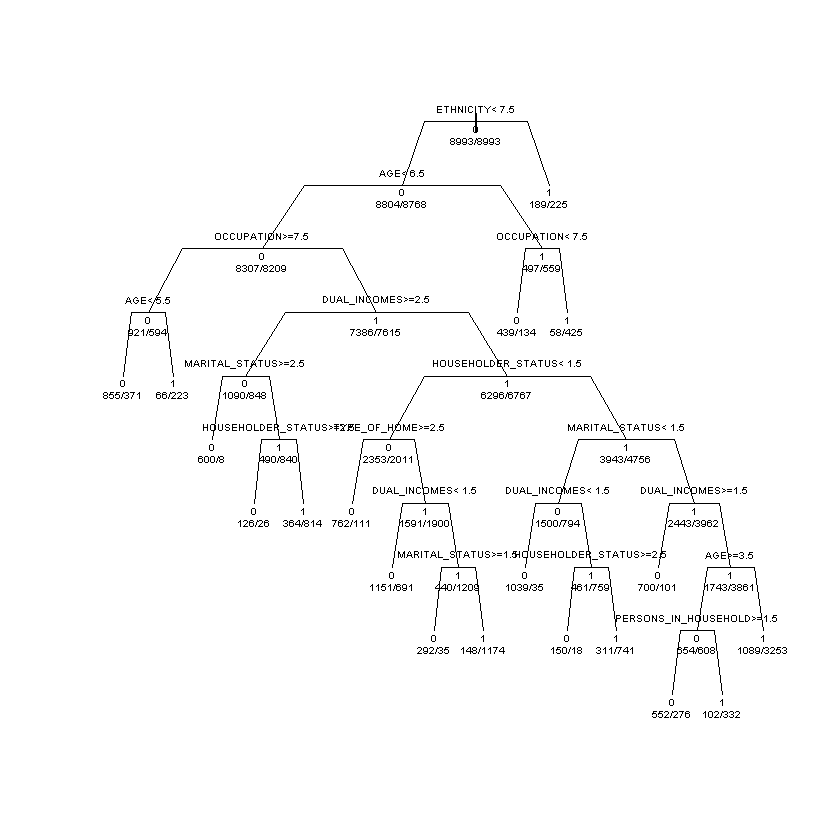

In [23]:
# Plot the tree
plot(class_tree, uniform = T, compress = T, branch=0.7)
text(class_tree, cex=0.5, use.n=T, all=T)

In [24]:
predicted <- predict(class_tree, type = "prob")
df = data.frame(Actual_Target  = combined_data$TARGET, target = predicted)
df$Predicted_Target <- with(df, ifelse(target.0 > target.1, '0', '1'))

In [25]:
predicted <- predict(class_tree,combined_data[, -c(15)],type = "prob")
predicted

0,1
0.9674115,0.03258845
0.6666667,0.33333333
0.2956274,0.70437262
0.8739076,0.12609238
0.9868421,0.01315789
0.2508061,0.74919392
0.2956274,0.70437262
0.6973899,0.30261011
0.6973899,0.30261011
0.6973899,0.30261011


In [26]:
drop <- c("target.0","target.1")
head(df[ , !(names(df) %in% drop)])

Actual_Target,Predicted_Target
0,0
0,0
0,1
0,0
0,0
0,1


In [27]:
# combine predicted probabilities with original data and rename the class columns.
predicted_probability <- cbind(combined_data,predicted)
colnames(predicted_probability)[16] <- "Class_0"
colnames(predicted_probability)[17] <- "Class_1"

In [28]:
# To find just the terminal node we will remove the duplicates.
terminal_nodes <- predicted_probability %>% distinct(Class_1, .keep_all = TRUE)
terminal_nodes

,ANNUAL_INCOME,SEX,MARITAL_STATUS,AGE,EDUCATION,OCCUPATION,YEARS_LIVED_IN_SAN.FRAN_OAKLAND_SANJOSE,DUAL_INCOMES,PERSONS_IN_HOUSEHOLD,PERSON_UNDER_18,HOUSEHOLDER_STATUS,TYPE_OF_HOME,ETHNICITY,LANGUAGE,TARGET,Class_0,Class_1
1,4,1,1,3,3,1,3,1,1,2,2,2,3,1,0,0.9674115,0.03258845
2,1,2,2,5,4,1,5,1,4,0,3,1,7,1,0,0.6666667,0.33333333
3,8,2,1,6,5,6,5,2,3,0,2,5,7,1,0,0.2956274,0.70437262
4,5,2,3,3,3,5,5,2,3,0,3,1,7,1,0,0.8739076,0.12609238
5,8,2,5,1,4,1,3,3,5,0,2,1,3,1,0,0.9868421,0.01315789
6,2,1,5,2,3,1,NA,1,6,0,3,1,7,1,0,0.2508061,0.74919392
8,8,2,5,2,6,8,5,3,3,1,1,1,NA,1,0,0.6973899,0.30261011
13,6,1,1,2,3,6,5,1,NA,1,1,1,8,1,0,0.4565217,0.54347826
14,7,2,2,7,3,2,4,1,3,0,3,5,7,3,0,0.7661431,0.23385689
21,6,1,1,2,5,7,5,2,3,0,3,1,7,1,0,0.8928571,0.10714286


In [29]:
# Ordering the terminal nodes in descending order.
highest_node = terminal_nodes[order(-terminal_nodes$Class_1), ]
head(highest_node)

,ANNUAL_INCOME,SEX,MARITAL_STATUS,AGE,EDUCATION,OCCUPATION,YEARS_LIVED_IN_SAN.FRAN_OAKLAND_SANJOSE,DUAL_INCOMES,PERSONS_IN_HOUSEHOLD,PERSON_UNDER_18,HOUSEHOLDER_STATUS,TYPE_OF_HOME,ETHNICITY,LANGUAGE,TARGET,Class_0,Class_1
79,4,2,1,4,4,1,5,2,4,0,1,1,7,3,0,0.1119516,0.8880484
145,8,2,5,7,4,9,5,1,2,0,3,1,5,2,0,0.1200828,0.8799172
112,4,2,5,6,5,8,4,2,4,1,2,1,7,1,0,0.2283737,0.7716263
62,8,2,2,4,3,2,5,1,1,4,2,1,5,NA,0,0.2350230,0.7649770
6,2,1,5,2,3,1,NA,1,6,0,3,1,7,1,0,0.2508061,0.7491939
3,8,2,1,6,5,6,5,2,3,0,2,5,7,1,0,0.2956274,0.7043726


## Question 3 - Consider the Boston Housing Data in the ISLR2 package. (Important – do not use data from any other packages).
### a. Visualize the data using histograms of the different variables in the data set. Transform the data into a binary incidence matrix, and justify the choices you make in grouping categories.

In [30]:
data(Boston)
head(Boston)
dim(Boston)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7


[1] 506  13

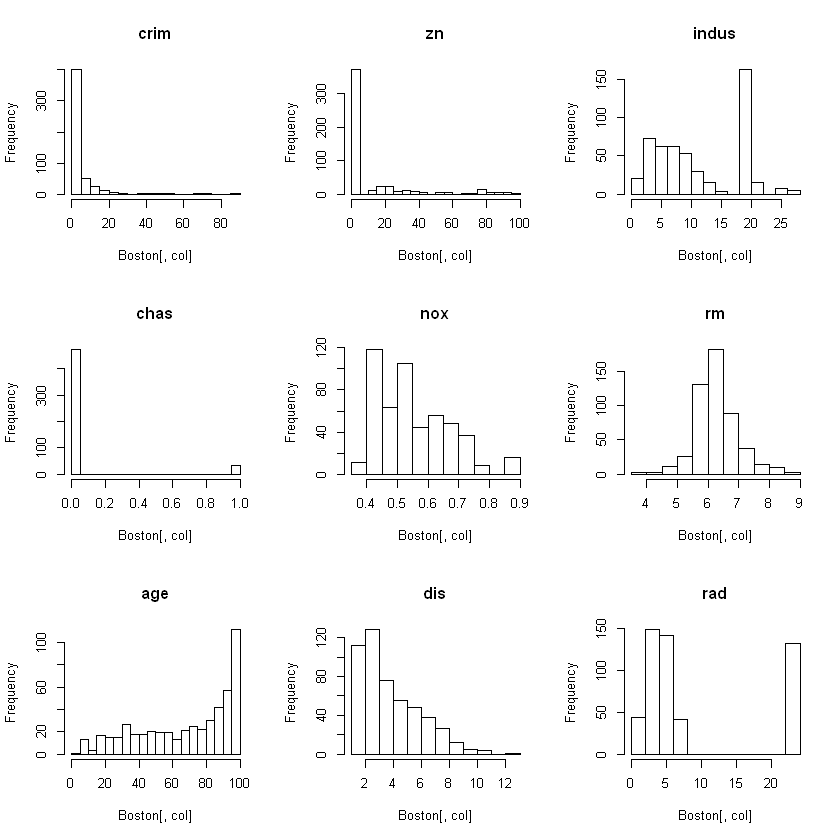

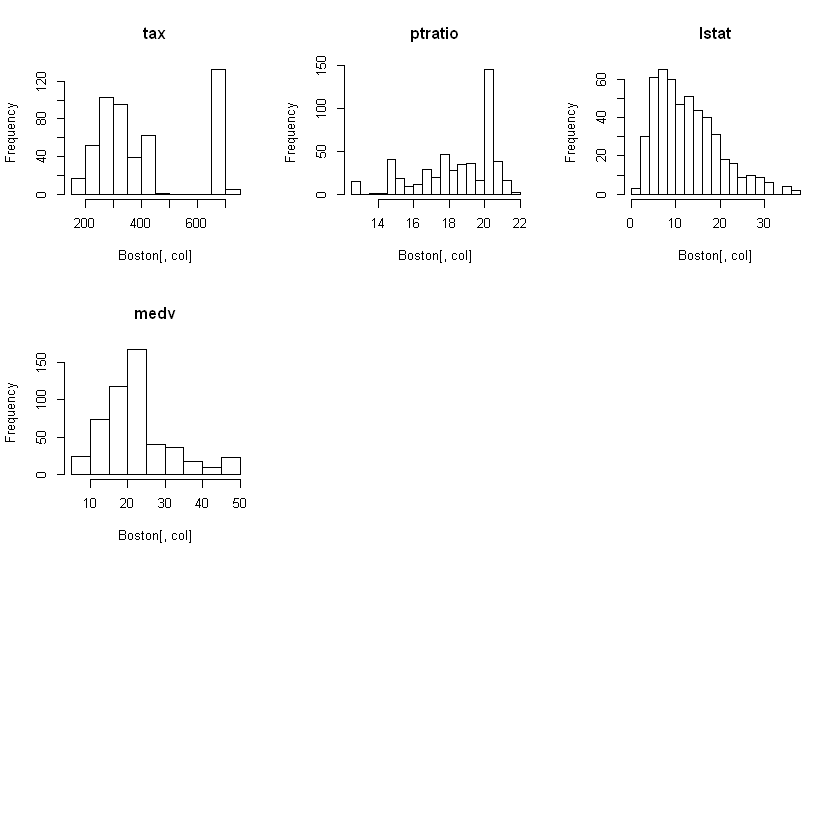

In [31]:
# Histograms of all the columns [a]
par(mfrow=c(3,3))
for (col in 1:ncol(Boston)) {
  hist(Boston[,col], main=colnames(Boston)[col], breaks=15)
}

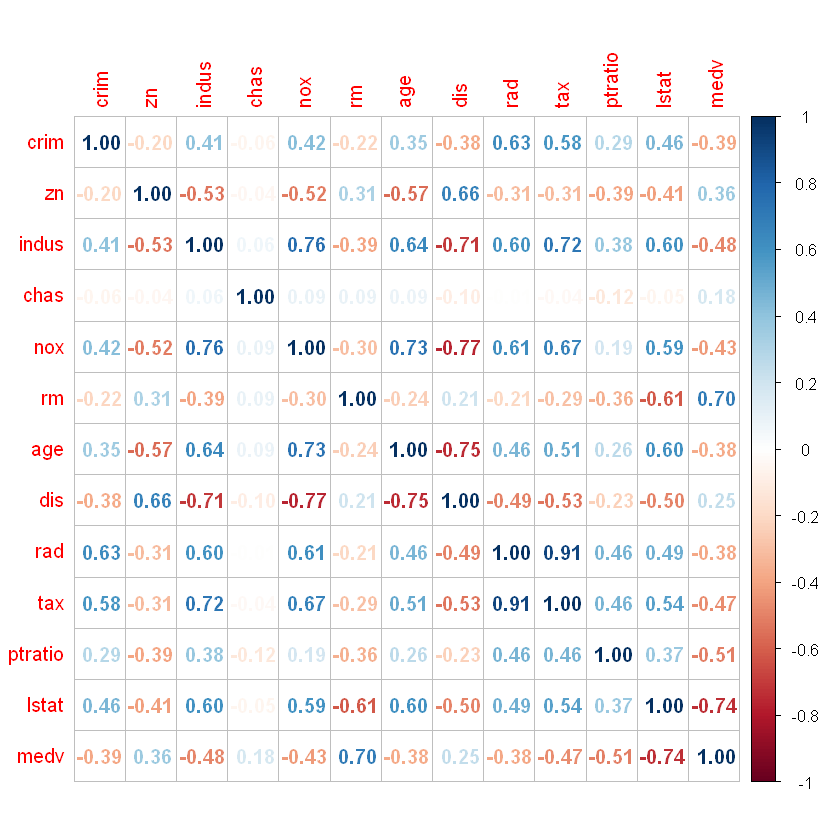

In [32]:
corrplot(cor(Boston), method = "number")

In [33]:
summary(Boston)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

In [34]:
#based on mean
Boston$crim <- ordered(cut(Boston$crim, c(0, 3.61, 90), labels=c('Safe', 'Unsafe'))) 

#based on mean
Boston$zn <- ordered(cut(Boston$zn, c(0,11.36, 101), labels=c('Low', 'High'))) 

# based on quartile range
Boston$indus <- ordered(cut(Boston$indus,  c(0,5.19, 18.10, 30), labels=c('Low', 'Medium', 'High')))

# chas = 1 if tract bounds river; 0 otherwise.
Boston$chas <- ordered(cut(Boston$chas, c(0, 0.5, 1), labels=c('Unbounds', 'Tract_Bounds'))) 

# based on quartile range
Boston$nox <- ordered(cut(Boston$nox, c(0, 0.4490, 0.6240, 0.9), labels=c('Low', 'Medium', 'High')))

# based on quartile range
Boston$rm <- ordered(cut(Boston$rm, c(0, 5.886, 6.623, 9), labels=c('Less', 'Sufficient', 'Many')))

# based on mean
Boston$age<- ordered(cut(Boston$age, c(0, 25, 65 ,100), labels=c('Young', 'Middle-Aged', 'Senior')))

# based on 3rd quartile range
Boston$dis <- ordered(cut(Boston$dis, c(0, 6, 12.127), labels=c('Close', 'Far')))

# Based on 1st quartile range
Boston$rad <- ordered(cut(Boston$rad, c(0, 4, 25), labels=c('Near', 'Far')))

# Based on quartile range
Boston$tax <- ordered(cut(Boston$tax, c(0, 280, 380, 712), labels=c('Low','Medium','High')))

# Based on quartile range
Boston$ptratio <- ordered(cut(Boston$ptratio, c(0, 17.40, 20.20, 22.00), labels=c('Low','Medium','High')))

# Based on quartile range
Boston$lstat <- ordered(cut(Boston$lstat, c(0, 6.95, 16.95, 37.97), labels=c('Low','Medium','High')))


Boston$medv <- ordered(cut(Boston$medv, c(0, 21.20 ,  50.00  ), labels=c('Low', 'High')))

In [35]:
# binary incidence matrix
boston_matrix <- as(Boston, 'transactions')
summary(boston_matrix)

transactions as itemMatrix in sparse format with
 506 rows (elements/itemsets/transactions) and
 31 columns (items) and a density of 0.3656126 

most frequent items:
   dis=Close    crim=Safe indus=Medium      rad=Far   age=Senior      (Other) 
         419          378          315          314          308         4001 

element (itemset/transaction) length distribution:
sizes
 11  12  13 
344 155   7 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  11.00   11.00   11.00   11.33   12.00   13.00 

includes extended item information - examples:
       labels variables levels
1   crim=Safe      crim   Safe
2 crim=Unsafe      crim Unsafe
3     zn=High        zn   High

includes extended transaction information - examples:
  transactionID
1             1
2             2
3             3

### b. Visualize the data using the itemFrequencyPlot in the “arules” package. Apply the apriori algorithm 

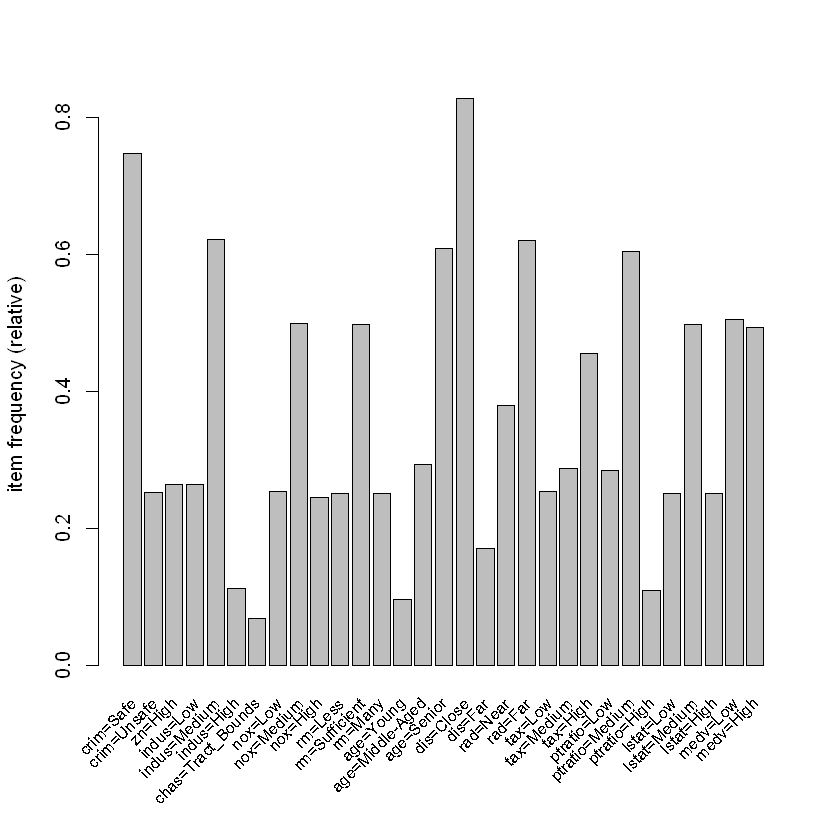

In [36]:
#plot
itemFrequencyPlot(boston_matrix, support=0.03, cex.names=0.8)

In [37]:
rules  <- apriori(boston_matrix, parameter = list(support = 0.01, confidence = 0.80, minlen =2))
summary(rules)
sample(labels(rules), size=5)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.01      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 5 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[31 item(s), 506 transaction(s)] done [0.00s].
sorting and recoding items ... [31 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10

Warning message in apriori(boston_matrix, parameter = list(support = 0.01, confidence = 0.8, :
"Mining stopped (maxlen reached). Only patterns up to a length of 10 returned!"

 done [0.04s].
writing ... [163362 rule(s)] done [0.06s].
creating S4 object  ... done [0.16s].


set of 163362 rules

rule length distribution (lhs + rhs):sizes
    2     3     4     5     6     7     8     9    10 
   64  1116  7587 25175 44527 44987 27371 10247  2288 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   6.000   7.000   6.586   7.000  10.000 

summary of quality measures:
    support          confidence        coverage            lift        
 Min.   :0.01186   Min.   :0.8000   Min.   :0.01186   Min.   : 0.9661  
 1st Qu.:0.01383   1st Qu.:0.9091   1st Qu.:0.01383   1st Qu.: 1.3386  
 Median :0.01779   Median :1.0000   Median :0.01976   Median : 1.7126  
 Mean   :0.02882   Mean   :0.9588   Mean   :0.03033   Mean   : 2.2255  
 3rd Qu.:0.02964   3rd Qu.:1.0000   3rd Qu.:0.03162   3rd Qu.: 3.1251  
 Max.   :0.58696   Max.   :1.0000   Max.   :0.62253   Max.   :10.3265  
     count       
 Min.   :  6.00  
 1st Qu.:  7.00  
 Median :  9.00  
 Mean   : 14.58  
 3rd Qu.: 15.00  
 Max.   :297.00  

mining info:
          data ntransactions support confidence
 bost

[1] "{zn=High,indus=Low,age=Senior,lstat=Low} => {crim=Safe}"                                          
[2] "{crim=Safe,rm=Less,age=Senior,rad=Near,tax=Low,ptratio=Medium} => {dis=Close}"                    
[3] "{crim=Safe,indus=High,rm=Sufficient,dis=Close,tax=High,ptratio=High,lstat=Medium} => {age=Senior}"
[4] "{crim=Safe,nox=High,dis=Close,tax=Low,ptratio=Low,lstat=Medium} => {zn=High}"                     
[5] "{zn=High,indus=Low,nox=Low,age=Middle-Aged,rad=Near,ptratio=Low,lstat=Low} => {rm=Many}"

### c. A student is interested low taxes, but wants to be in a safe aera with low crime. What can you advise on this matter through the mining of association rules?

In [38]:
ruleslowCrime <- subset(rules, subset = lhs %ain% c('crim=Safe', 'tax=Low') &rhs %in% 'dis=Close' & lift>1.2)
summary(ruleslowCrime)
inspect(head(sort(ruleslowCrime, by='support'), n=10))


ruleslowCrime <- subset(rules, subset = lhs %ain% c('crim=Safe','dis=Close') &rhs %in% 'tax=Low' & lift>1.2)
summary(ruleslowCrime)
inspect(head(sort(ruleslowCrime, by='support'), n=10))

set of 1144 rules

rule length distribution (lhs + rhs):sizes
  4   5   6   7   8   9  10 
  5  53 201 346 311 170  58 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   4.00    7.00    7.00    7.44    8.00   10.00 

summary of quality measures:
    support          confidence    coverage            lift      
 Min.   :0.01186   Min.   :1    Min.   :0.01186   Min.   :1.208  
 1st Qu.:0.01186   1st Qu.:1    1st Qu.:0.01186   1st Qu.:1.208  
 Median :0.01581   Median :1    Median :0.01581   Median :1.208  
 Mean   :0.01792   Mean   :1    Mean   :0.01792   Mean   :1.208  
 3rd Qu.:0.01976   3rd Qu.:1    3rd Qu.:0.01976   3rd Qu.:1.208  
 Max.   :0.09091   Max.   :1    Max.   :0.09091   Max.   :1.208  
     count       
 Min.   : 6.000  
 1st Qu.: 6.000  
 Median : 8.000  
 Mean   : 9.066  
 3rd Qu.:10.000  
 Max.   :46.000  

mining info:
          data ntransactions support confidence
 boston_matrix           506    0.01        0.8

     lhs                 rhs            support confidence   coverage     lift count
[1]  {crim=Safe,                                                                    
      age=Senior,                                                                   
      tax=Low}        => {dis=Close} 0.09090909          1 0.09090909 1.207637    46
[2]  {crim=Safe,                                                                    
      nox=Medium,                                                                   
      tax=Low,                                                                      
      lstat=Medium}   => {dis=Close} 0.07905138          1 0.07905138 1.207637    40
[3]  {crim=Safe,                                                                    
      indus=Medium,                                                                 
      nox=Medium,                                                                   
      tax=Low}        => {dis=Close} 0.06719368          1 0.0671

set of 987 rules

rule length distribution (lhs + rhs):sizes
  5   6   7   8   9  10 
 16 112 281 325 190  63 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.00    7.00    8.00    7.76    9.00   10.00 

summary of quality measures:
    support          confidence        coverage            lift      
 Min.   :0.01186   Min.   :0.8000   Min.   :0.01186   Min.   :3.138  
 1st Qu.:0.01383   1st Qu.:0.8571   1st Qu.:0.01383   1st Qu.:3.362  
 Median :0.01779   Median :0.9167   Median :0.01779   Median :3.596  
 Mean   :0.02004   Mean   :0.9247   Mean   :0.02217   Mean   :3.627  
 3rd Qu.:0.02372   3rd Qu.:1.0000   3rd Qu.:0.02569   3rd Qu.:3.922  
 Max.   :0.10277   Max.   :1.0000   Max.   :0.12846   Max.   :3.922  
     count      
 Min.   : 6.00  
 1st Qu.: 7.00  
 Median : 9.00  
 Mean   :10.14  
 3rd Qu.:12.00  
 Max.   :52.00  

mining info:
          data ntransactions support confidence
 boston_matrix           506    0.01        0.8

     lhs                  rhs          support confidence   coverage     lift count
[1]  {crim=Safe,                                                                   
      dis=Close,                                                                   
      rad=Near,                                                                    
      ptratio=Medium,                                                              
      medv=High}       => {tax=Low} 0.10276680  0.8000000 0.12845850 3.137984    52
[2]  {crim=Safe,                                                                   
      indus=Low,                                                                   
      rm=Many,                                                                     
      dis=Close}       => {tax=Low} 0.07312253  0.8809524 0.08300395 3.455519    37
[3]  {crim=Safe,                                                                   
      indus=Low,                                                            

- Applying some association rules, we can suggest the student interested in low taxes, but wants to be in a safe area with low crime as: 

1. From above we can tell that the association between safe crime area with low tax, a student can find a housing.
                                                                           

## d. A family is moving to the area, and has made schooling a priority. They want schools with low pupil-teacher ratios. What can you advise on this matter through the mining of association rules?

In [39]:
ruleslowpt <- subset(rules, subset = rhs %in% 'ptratio=Low' & lift>2.5)
summary(ruleslowpt)
inspect(head(sort(ruleslowpt, by='support', decreasing = TRUE), n=10))

set of 4413 rules

rule length distribution (lhs + rhs):sizes
   3    4    5    6    7    8    9   10 
  10  102  476 1058 1303  951  411  102 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   6.000   7.000   6.937   8.000  10.000 

summary of quality measures:
    support          confidence       coverage            lift      
 Min.   :0.01186   Min.   :0.800   Min.   :0.01186   Min.   :2.811  
 1st Qu.:0.01383   1st Qu.:0.875   1st Qu.:0.01383   1st Qu.:3.075  
 Median :0.01581   Median :1.000   Median :0.01779   Median :3.514  
 Mean   :0.01821   Mean   :0.942   Mean   :0.01962   Mean   :3.310  
 3rd Qu.:0.01976   3rd Qu.:1.000   3rd Qu.:0.02174   3rd Qu.:3.514  
 Max.   :0.09684   Max.   :1.000   Max.   :0.11265   Max.   :3.514  
     count       
 Min.   : 6.000  
 1st Qu.: 7.000  
 Median : 8.000  
 Mean   : 9.214  
 3rd Qu.:10.000  
 Max.   :49.000  

mining info:
          data ntransactions support confidence
 boston_matrix           506    0.01        0.8

     lhs             rhs              support confidence   coverage     lift count
[1]  {crim=Safe,                                                                  
      age=Senior,                                                                 
      rad=Far,                                                                    
      medv=High}  => {ptratio=Low} 0.09683794  0.8596491 0.11264822 3.020712    49
[2]  {crim=Safe,                                                                  
      age=Senior,                                                                 
      dis=Close,                                                                  
      rad=Far,                                                                    
      medv=High}  => {ptratio=Low} 0.09683794  0.8750000 0.11067194 3.074653    49
[3]  {crim=Safe,                                                                  
      rm=Many,                                                                    
    

- From above, we can tell that for schools in areas with crime safe areas with high median home values, are most likely to have low PTRatio.

### Extra Credit: Use a regression model to solve part d. Are you results comparable? Which provides an easier interpretation? When would regression be preferred, and when would association models be preferred?

In [40]:
data(Boston)

model_lm <- lm(ptratio~., data=Boston)
summary(model_lm)


Call:
lm(formula = ptratio ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2228 -1.0341 -0.0015  0.9260  4.8646 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.571e+01  1.263e+00  20.357  < 2e-16 ***
crim        -1.766e-02  1.083e-02  -1.632  0.10339    
zn          -2.499e-02  4.415e-03  -5.660 2.57e-08 ***
indus        5.633e-02  2.001e-02   2.815  0.00507 ** 
chas        -2.697e-01  2.851e-01  -0.946  0.34469    
nox         -1.066e+01  1.186e+00  -8.989  < 2e-16 ***
rm          -1.118e-01  1.464e-01  -0.764  0.44527    
age          7.725e-03  4.312e-03   1.792  0.07382 .  
dis         -1.855e-02  6.896e-02  -0.269  0.78806    
rad          1.145e-01  2.151e-02   5.322 1.56e-07 ***
tax          6.951e-04  1.247e-03   0.557  0.57748    
lstat       -4.034e-02  1.822e-02  -2.214  0.02730 *  
medv        -9.873e-02  1.392e-02  -7.091 4.63e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Resid

When we want to identify patterns or relation between two or more variables we use association rules and we need to understand  thar relationship we use regression model.

For example in our case we were interested to know if the family moving to a certain area has low teacher-pupil ratio and so we used associantion rule. However, if we wanted to understand this relation we can use regression.

For me association rules provide easy way of interpretation. As per my understanding if once we identify the relation or pattern it would be easier to apply any regression model if required.

References :
- a. https://datascience.stackexchange.com/questions/106369/print-histogram-for-each-of-the-columns-in-my-table-with-one-single-command
- b. https://www.statology.org/train-test-split-r/